In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../datasets/SuperStoreUS.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1951 non-null   int64  
 1   Order Priority        1951 non-null   object 
 2   Discount              1951 non-null   float64
 3   Unit Price            1951 non-null   float64
 4   Shipping Cost         1951 non-null   float64
 5   Customer ID           1951 non-null   int64  
 6   Customer Name         1951 non-null   object 
 7   Ship Mode             1951 non-null   object 
 8   Customer Segment      1951 non-null   object 
 9   Product Category      1951 non-null   object 
 10  Product Sub-Category  1951 non-null   object 
 11  Product Container     1951 non-null   object 
 12  Product Name          1951 non-null   object 
 13  Product Base Margin   1935 non-null   float64
 14  Country               1951 non-null   object 
 15  Region               

### 1. Analyze sales performance by region and state


In [6]:
sales_by_region = df.groupby(['Region', 'State or Province'])['Sales'].agg(['sum', 'mean'])

sales_by_region.index.get_level_values(0).unique()
sales_by_region
sales_by_region.groupby('Region')['sum'].sum()

Region
Central    448284.70
East       592115.05
South      357105.12
West       526776.57
Name: sum, dtype: float64

### 2. Calculate sales density by geographic location


In [16]:

sales_density = df.groupby(['Region', 'State or Province']).agg({
    'Sales': ['sum', 'count', 'mean']
}).round(2)

# Sales per transaction (a form of density)
sales_density.columns = ['Total_Sales', 'Transaction_Count', 'Avg_Sales_Per_Transaction']
print("Sales Density Analysis:")
sales_density.sort_values(('Total_Sales'), ascending=False)

Sales Density Analysis:


Total_Sales  Transaction_Count  \
Region  State or Province                                      
West    California              288310.61                214   
East    New York                223930.48                129   
Central Illinois                 98971.25                 88   
        Texas                    93082.73                124   
South   Florida                  87651.11                123   
West    Washington               83468.06                 61   
Central Michigan                 69641.81                 66   
East    Ohio                     69452.82                 81   
        District of Columbia     68946.66                 15   
        Massachusetts            59114.82                 46   
        Pennsylvania             52378.80                 51   
South   Alabama                  46826.45                 22   
West    Colorado                 45843.45                 44   
South   Virginia                 45282.87                 51   
        North Carolina           43983.30                 49   
Central Minnesota                41671.26                 51   
        Indiana                  41089.05                 53   
South   Tennessee                33209.76                 41   
        Georgia                  31992.21                 44   
East    Maine                    31131.74                 27   
Central Kansas                   29678.21                 27   
West    Utah                     26981.67                 38   
        Oregon                   25647.15                 28   
Central Wisconsin                22770.35                 39   
East    New Jersey               21943.91                 32   
South   South Carolina           16544.63                 30   
Central Nebraska                 15764.51                 18   
East    Maryland                 15597.44                 34   
South   Kentucky                 15291.35                 22   
        Louisiana                14909.43                 20   
West    Arizona                  14367.86                 31   
        Idaho                    13922.92                 20   
East    Vermont                  13491.00                 11   
West    Montana                  12593.59                  7   
South   Arkansas                 11724.43                 22   
Central Iowa                     10977.69                 38   
        Missouri                 10903.08                 27   
East    West Virginia            10681.55                  9   
        Rhode Island             10027.83                  5   
South   Mississippi               9689.58                 18   
West    Nevada                    8864.54                 14   
East    New Hampshire             7619.70                 11   
Central Oklahoma                  6884.04                 18   
East    Connecticut               6540.54                 20   
West    New Mexico                5593.18                 10   
Central North Dakota              5300.23                 10   
        South Dakota              1550.49                  7   
East    Delaware                  1257.76                  2   
West    Wyoming                   1183.54                  3   

                              Avg_Sales_Per_Transaction  
Region  State or Province                                
West    California                              1347.25  
East    New York                                1735.90  
Central Illinois                                1124.67  
        Texas                                    750.67  
South   Florida                                  712.61  
West    Washington                              1368.33  
Central Michigan                                1055.18  
East    Ohio                                     857.44  
        District of Columbia                    4596.44  
        Massachusetts                           1285.10  
        Pennsylvania                            1027.04  
South   Ala

### 3. Identify top 10 cities by sales volume

In [7]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

City
Los Angeles      154806.11
New York City    145010.54
Washington        68946.66
Boston            49654.82
Seattle           38437.77
Detroit           29451.26
Philadelphia      28442.95
Chicago           22958.00
Madison           20974.45
Miami             19266.40
Name: Sales, dtype: float64

### 4. Analyze shipping costs vs. sales by region

In [10]:
df.groupby('Region')[['Sales', 'Shipping Cost']].sum()

,Sales,Shipping Cost
Region,,
Central,448284.70,7117.80
East,592115.05,6531.77
South,357105.12,5670.11
West,526776.57,5984.92


### 5. Create a geographic performance heatmap

HEATMAP 1: REGIONS PERFORMANCE


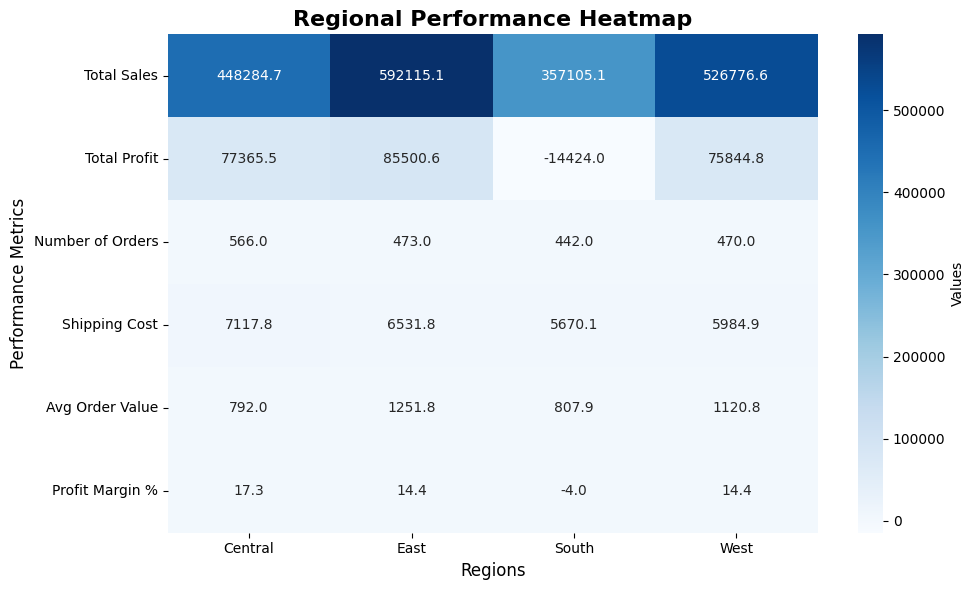

In [41]:

print("HEATMAP 1: REGIONS PERFORMANCE")
print("=" * 50)

# Step 1: Calculate metrics for each region
region_data = df.groupby('Region').agg({
    'Sales': 'sum',           # Total sales per region
    'Profit': 'sum',          # Total profit per region
    'Order ID': 'count',      # Number of orders per region
    'Shipping Cost': 'sum'    # Total shipping cost per region
}).round(2)

# Step 2: Rename columns to be clearer
region_data.columns = ['Total Sales', 'Total Profit', 'Number of Orders', 'Shipping Cost']

# Step 3: Add calculated metrics
region_data['Avg Order Value'] = (region_data['Total Sales'] / region_data['Number of Orders']).round(2)
region_data['Profit Margin %'] = ((region_data['Total Profit'] / region_data['Total Sales']) * 100).round(1)

plt.figure(figsize=(10, 6))

# Create heatmap with the data transposed
sns.heatmap(
    region_data.T,                    # .T flips rows and columns
    annot=True,                       # Show numbers in each cell
    fmt='.1f',                        # Show 1 decimal place
    cmap='Blues',                     # Blue color scheme
    cbar_kws={'label': 'Values'}      # Label for color bar
)

# Add labels and title
plt.title('Regional Performance Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
plt.xticks(rotation=0)  # Keep region names horizontal
plt.yticks(rotation=0)  # Keep metric names horizontal

# Make it look nice
plt.tight_layout()
plt.show()


HEATMAP 2: STATE PERFORMANCE


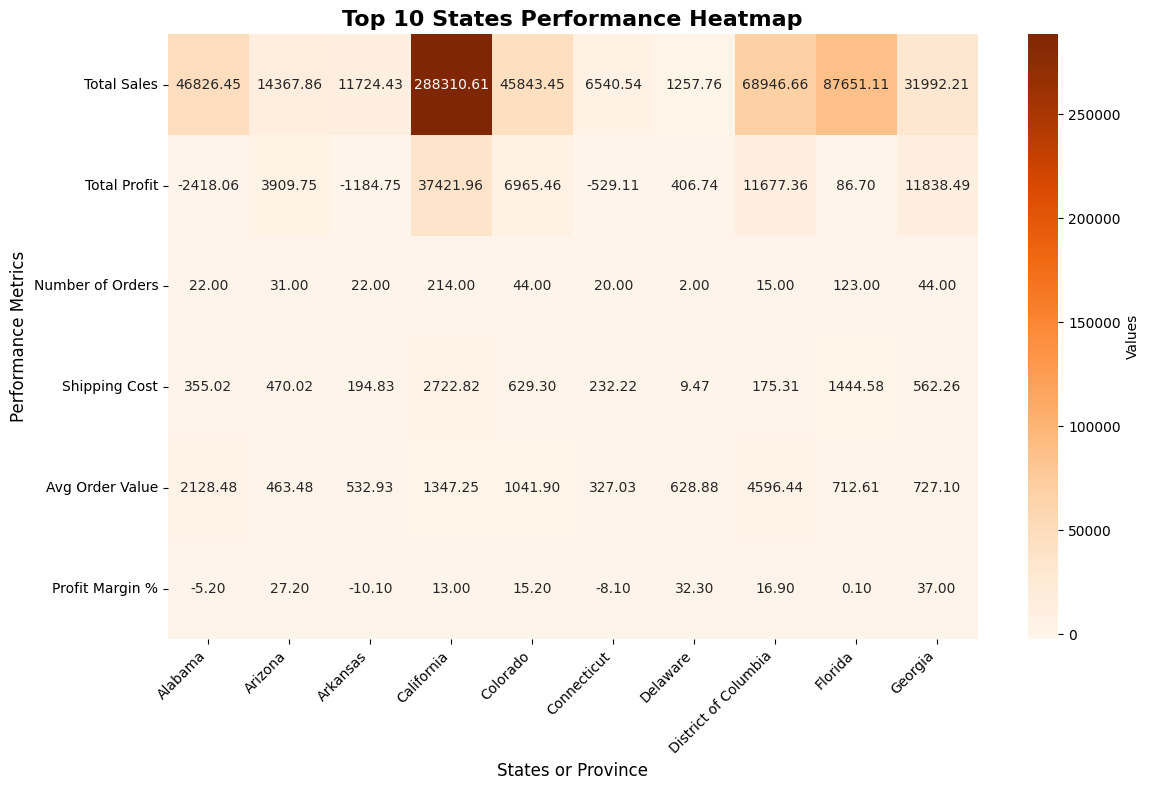

In [42]:
print("HEATMAP 2: STATE PERFORMANCE")
print("=" * 50)

# Step 1: Get top 10 cities by sales (so heatmap isn't too crowded)
top_State_sales = df.groupby('State or Province')['Sales'].sum().head(10)


# Step 2: Calculate metrics for these top 10 cities
State_data = df[df['State or Province'].isin(top_State_sales.index)].groupby('State or Province').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Shipping Cost': 'sum'
}).round(2)

# Step 3: Rename columns to be clearer
State_data.columns = ['Total Sales', 'Total Profit', 'Number of Orders', 'Shipping Cost']

# Step 4: Add calculated metrics
State_data['Avg Order Value'] = (State_data['Total Sales'] / State_data['Number of Orders']).round(2)
State_data['Profit Margin %'] = ((State_data['Total Profit'] / State_data['Total Sales']) * 100).round(1)

# Step 5: Sort cities by sales (highest first)
State_data = State_data.loc[top_State_sales.index]

# Step 7: Create the heatmap for cities
plt.figure(figsize=(12, 8))

# Create heatmap with the data transposed
sns.heatmap(
    State_data.T,
    annot=True,
    fmt='.2f',
    cmap='Oranges',
    cbar_kws={'label': 'Values'}
)

# Add labels and title
plt.title('Top 10 States Performance Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('States or Province', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)

# Make it look nice
plt.tight_layout()
plt.show()